In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# 1. Load and clean data


In [2]:
data = pd.read_csv("D:\DREAM TEAM\_temperature_data.csv")
data.columns = data.columns.str.strip()
columns_needed = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'TEMP', 'HUMIDITY', 'WIND_SPEED', 'CLOUD_COVER']
data[columns_needed] = data[columns_needed].apply(pd.to_numeric, errors='coerce')
data.dropna(subset=columns_needed, inplace=True)
data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\yashs\AppData\Local\Temp\ipykernel_21660\2948549381.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\DREAM TEAM\_temperature_data.csv")


,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER
0,2014,6,12,1,118,82,20,2.0
1,2014,6,12,2,128,80,10,3.0
2,2014,6,12,3,114,86,10,1.0
3,2014,6,12,4,117,87,10,0.0
4,2014,6,12,5,139,84,20,0.0
...,...,...,...,...,...,...,...,...
87667,2024,6,11,20,107,74,20,0.0
87668,2024,6,11,21,98,82,20,1.0
87669,2024,6,11,22,96,82,20,0.0
87670,2024,6,11,23,85,86,20,0.0


 # 2. Filter for specific time

In [3]:
month = 9
hour = 10
df = data[(data['MONTH'] == month) & (data['HOUR'] == hour)].copy()
df

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER
1953,2014,9,1,10,157,81,20,2.0
1977,2014,9,2,10,202,60,20,6.0
2001,2014,9,3,10,179,65,60,1.0
2025,2014,9,4,10,193,70,50,1.0
2049,2014,9,5,10,213,66,20,1.0
...,...,...,...,...,...,...,...,...
81441,2023,9,26,10,202,58,40,5.0
81465,2023,9,27,10,206,64,10,7.0
81489,2023,9,28,10,187,72,40,8.0
81513,2023,9,29,10,206,73,70,7.0


 # 3. Calculate TEMP_CHANGE and prepare training data

In [4]:
df['TEMP_CHANGE'] = df['TEMP'].diff().shift(-1)
df_trimmed = df.iloc[:-1]
last_row = df.iloc[[-1]].drop('TEMP_CHANGE', axis=1)

feature_cols = ['TEMP', 'HUMIDITY', 'WIND_SPEED', 'CLOUD_COVER']
X = df_trimmed[feature_cols]
y = df_trimmed['TEMP_CHANGE']
df_trimmed

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER,TEMP_CHANGE
1953,2014,9,1,10,157,81,20,2.0,45.0
1977,2014,9,2,10,202,60,20,6.0,-23.0
2001,2014,9,3,10,179,65,60,1.0,14.0
2025,2014,9,4,10,193,70,50,1.0,20.0
2049,2014,9,5,10,213,66,20,1.0,-17.0
...,...,...,...,...,...,...,...,...,...
81417,2023,9,25,10,187,56,40,8.0,15.0
81441,2023,9,26,10,202,58,40,5.0,4.0
81465,2023,9,27,10,206,64,10,7.0,-19.0
81489,2023,9,28,10,187,72,40,8.0,19.0


# 4. Train the model

In [5]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

# 5. Predict next temperature change

In [6]:
features = last_row[feature_cols]  # Keep it as a DataFrame
y_pred = model.predict(features)[0]
last_row['TEMP_CHANGE'] = y_pred

df = df.iloc[:-1]  # remove old last row
df = pd.concat([df, pd.DataFrame(last_row)], ignore_index=True)
df

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER,TEMP_CHANGE
0,2014,9,1,10,157,81,20,2.0,45.000000
1,2014,9,2,10,202,60,20,6.0,-23.000000
2,2014,9,3,10,179,65,60,1.0,14.000000
3,2014,9,4,10,193,70,50,1.0,20.000000
4,2014,9,5,10,213,66,20,1.0,-17.000000
...,...,...,...,...,...,...,...,...,...
295,2023,9,26,10,202,58,40,5.0,4.000000
296,2023,9,27,10,206,64,10,7.0,-19.000000
297,2023,9,28,10,187,72,40,8.0,19.000000
298,2023,9,29,10,206,73,70,7.0,-47.000000


# Datetime of the last_row

In [7]:
# Step 1: Get the datetime of the last_row
last_datetime = pd.to_datetime({
    'year': [int(last_row['YEAR'].values[0])],
    'month': [int(last_row['MONTH'].values[0])],
    'day': [int(last_row['DAY'].values[0])],
    'hour': [int(last_row['HOUR'].values[0])]
})[0]

# Step 2: Generate next 12 hourly datetimes
next_12_hours = [last_datetime + timedelta(hours=i) for i in range(1, 13)]
next_12_df = pd.DataFrame(next_12_hours, columns=['DATETIME'])

# # Step 3: Convert the original data to datetime for filtering
data['DATETIME'] = pd.to_datetime(data[['YEAR', 'MONTH', 'DAY', 'HOUR']])

# # Step 4: Filter the original data for next 12 hours
future_data = data[data['DATETIME'].isin(next_12_df['DATETIME'])].copy()

# # Display the result
print(future_data)
# print(next_12_df)


       YEAR  MONTH  DAY  HOUR  TEMP  HUMIDITY  WIND_SPEED  CLOUD_COVER  \
81538  2023      9   30    11   166        75          20          8.0   
81539  2023      9   30    12   171        72          20          8.0   
81540  2023      9   30    13   176        71          30          4.0   
81541  2023      9   30    14   178        64          30          8.0   
81542  2023      9   30    15   173        64          20          8.0   
81543  2023      9   30    16   174        62          10          8.0   
81544  2023      9   30    17   161        70          10          8.0   
81545  2023      9   30    18   133        87          10          8.0   
81546  2023      9   30    19   126        90          10          8.0   
81547  2023      9   30    20   126        88          20          8.0   
81548  2023      9   30    21   124        88          20          2.0   
81549  2023      9   30    22   116        84          30          2.0   

                 DATETIME  
81538 202

# Assume last_row, model, data, and future_data are already defined as in your code


In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from datetime import timedelta

# Assume last_row, model, data, and future_data are already defined as in your code

# Step 6: Forecast future temperatures
predictions = []

# Convert last_row to dictionary for feature reuse
current_data = last_row.iloc[0].to_dict()

# Loop through each row of the future_data
for index, row in future_data.iterrows():
    temp_input = {
        'TEMP': row['TEMP'],
        'HUMIDITY': current_data['HUMIDITY'],
        'WIND_SPEED': current_data['WIND_SPEED'],
        'CLOUD_COVER': current_data['CLOUD_COVER']
    }

    input_df = pd.DataFrame([temp_input])
    predicted_change = model.predict(input_df)[0]

    new_row = {
        'YEAR': row['YEAR'],
        'MONTH': row['MONTH'],
        'DAY': row['DAY'],
        'HOUR': row['HOUR'],
        'TEMP': row['TEMP'],
        'HUMIDITY': current_data['HUMIDITY'],
        'WIND_SPEED': current_data['WIND_SPEED'],
        'CLOUD_COVER': current_data['CLOUD_COVER'],
        'PREDICTED_TEMP_CHANGE': predicted_change
    }

    predictions.append(new_row)

# Step 7: Convert to DataFrame
predicted_df = pd.DataFrame(predictions)

# Display result
print(predicted_df)


    YEAR  MONTH  DAY  HOUR  TEMP  HUMIDITY  WIND_SPEED  CLOUD_COVER  \
0   2023      9   30    11   166      88.0        20.0          1.0   
1   2023      9   30    12   171      88.0        20.0          1.0   
2   2023      9   30    13   176      88.0        20.0          1.0   
3   2023      9   30    14   178      88.0        20.0          1.0   
4   2023      9   30    15   173      88.0        20.0          1.0   
5   2023      9   30    16   174      88.0        20.0          1.0   
6   2023      9   30    17   161      88.0        20.0          1.0   
7   2023      9   30    18   133      88.0        20.0          1.0   
8   2023      9   30    19   126      88.0        20.0          1.0   
9   2023      9   30    20   126      88.0        20.0          1.0   
10  2023      9   30    21   124      88.0        20.0          1.0   
11  2023      9   30    22   116      88.0        20.0          1.0   

    PREDICTED_TEMP_CHANGE  
0                9.614455  
1                8.0

In [9]:
predicted_df['TEMP']=predicted_df['TEMP']/10
predicted_df

,YEAR,MONTH,DAY,HOUR,TEMP,HUMIDITY,WIND_SPEED,CLOUD_COVER,PREDICTED_TEMP_CHANGE
0,2023,9,30,11,16.6,88.0,20.0,1.0,9.614455
1,2023,9,30,12,17.1,88.0,20.0,1.0,8.079728
2,2023,9,30,13,17.6,88.0,20.0,1.0,6.545002
3,2023,9,30,14,17.8,88.0,20.0,1.0,5.931111
4,2023,9,30,15,17.3,88.0,20.0,1.0,7.465838
5,2023,9,30,16,17.4,88.0,20.0,1.0,7.158892
6,2023,9,30,17,16.1,88.0,20.0,1.0,11.149181
7,2023,9,30,18,13.3,88.0,20.0,1.0,19.743649
8,2023,9,30,19,12.6,88.0,20.0,1.0,21.892266
9,2023,9,30,20,12.6,88.0,20.0,1.0,21.892266


# 9. Plot results

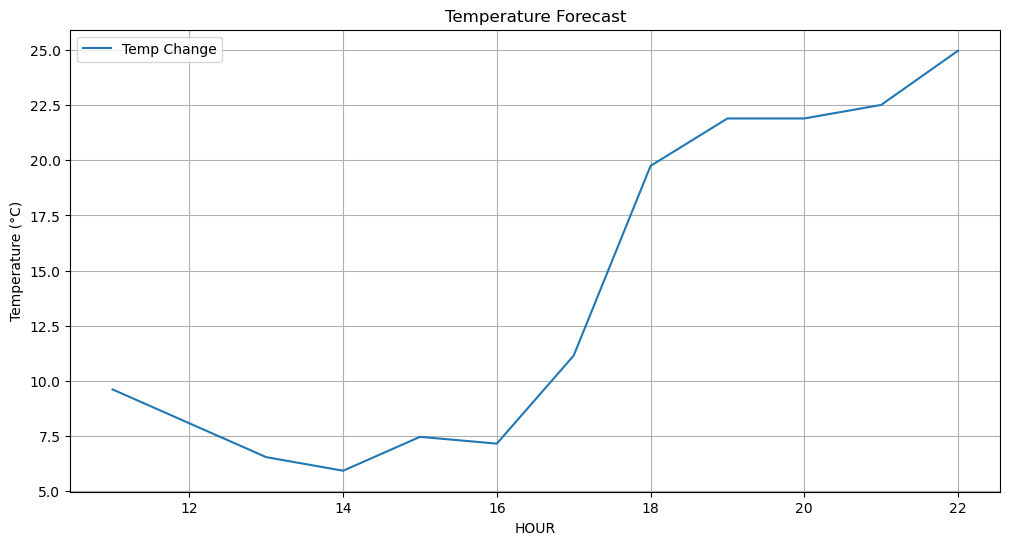

In [10]:
# 9. Plot results
plt.figure(figsize=(12, 6))
# plt.plot(predicted_df['HOUR'],predicted_df['TEMP'], label='Actual Temp')
plt.plot(predicted_df['HOUR'],predicted_df['PREDICTED_TEMP_CHANGE'], label='Temp Change')
plt.title('Temperature Forecast')
plt.xlabel('HOUR')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()